# Link 1

### Template matching using OpenCV in Python

- Template matching is a technique for finding areas of an image that are similar to a patch (template).
A patch is a small image with certain features. The goal of template matching is to find the patch/template in an image.
- In cases where almost identical templates are to be searched, the threshold should be set high.(t>=0.8)

### How Template Matching Works?

The template image simply slides over the input image (as in 2D convolution)
The template and patch of input image under the template image are compared.
The result obtained is compared with the threshold.
If the result is greater than threshold, the portion will be marked as detected.
In the function 

**cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)**
- the first parameter is the mainimage
- second parameter is the template to be matched
- third parameter is the method used for matching.

### Limitations of Template Matching:

Pattern occurrences have to preserve the orientation of the reference pattern image(template)
As a result, it **does not work** for rotated or scaled versions of the template as a change in shape/size/shear etc. of object w.r.t. template will give a false match.
The method is inefficient when calculating the pattern correlation image for medium to large images as the process is time consuming.

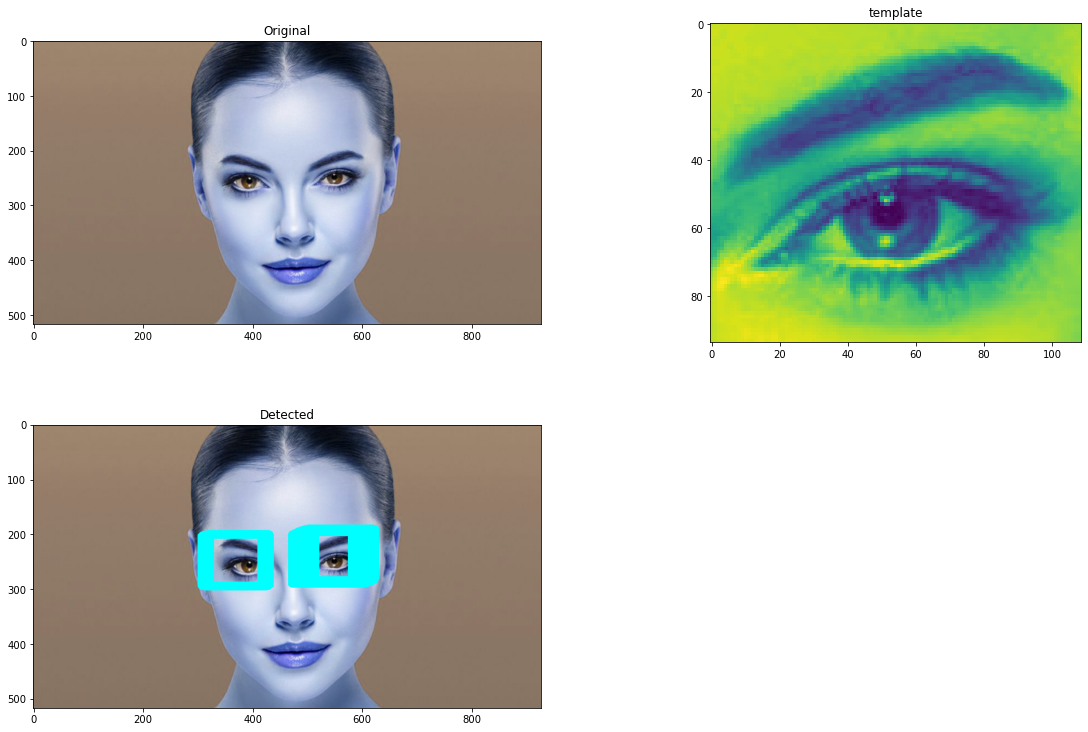

In [8]:
# Python program to illustrate 
# template matching 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
# Read the main image 
img_rgb = cv2.imread('img/face.jpg')
Orimg_rgb = cv2.imread('img/face.jpg')
# Convert it to grayscale 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 

# Read the template 
template = cv2.imread('img/eye.jpg',0)

# Store width and height of template in w and h 
w, h = template.shape[::-1] 

# Perform match operations. 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) 

# Specify a threshold 
#threshold = 0.8
threshold = 0.5
# Store the coordinates of matched area in a numpy array 
loc = np.where( res >= threshold) 

# Draw a rectangle around the matched region. 
for pt in zip(*loc[::-1]): 
	cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2) 

# Show the final image with the matched area. 
#cv2.imshow('Detected',img_rgb) 


Titles =["Original", "template","Detected"] 
images =[Orimg_rgb, template,img_rgb] 
count = 3
plt.figure(figsize=(20, 20))
for i in range(count): 
    plt.subplot(3, 2, i + 1) 
    plt.title(Titles[i]) 
    plt.imshow(images[i]) 
plt.show() 

### Template matching 

  - Is a technique in digital image processing for finding small parts of an image that matches a template image

(4140, 2745, 3)
(4160, 3120, 3)


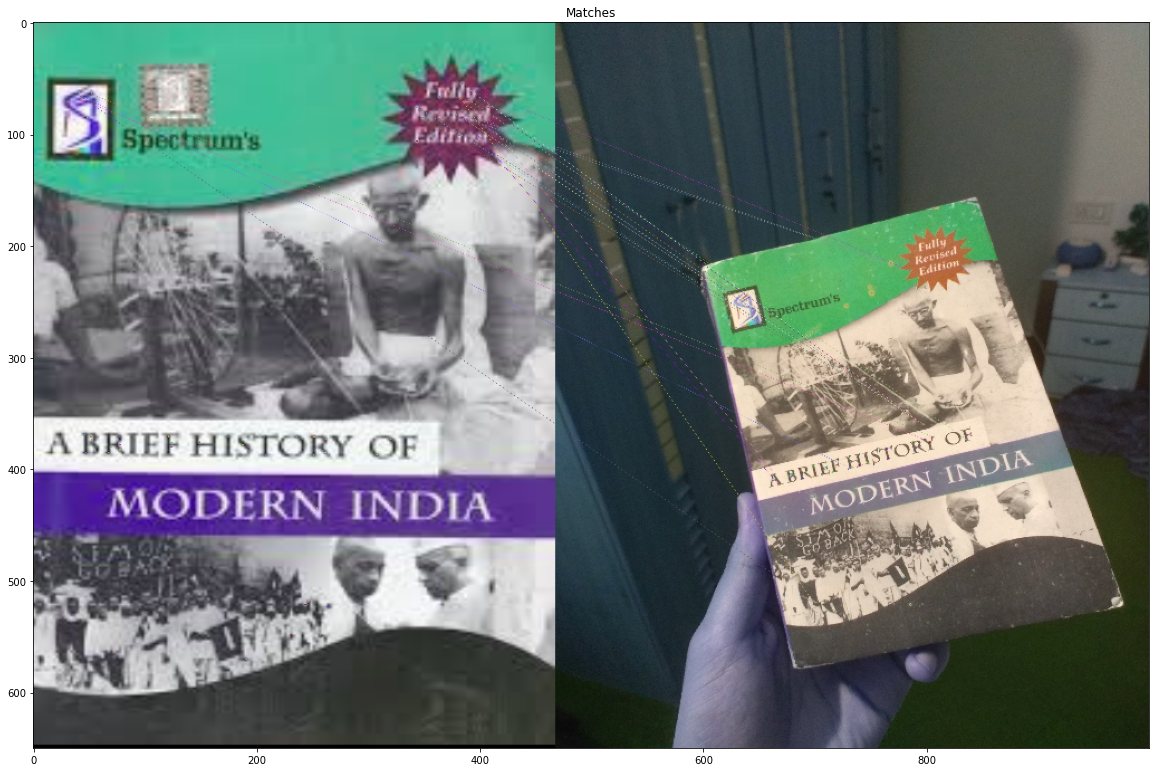

In [6]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

# Read the query image as query_img 
# and traing image This query image 
# is what you need to find in train image 
# Save it in the same directory 
# with the name image.jpg   
query_img = cv2.imread('img/Book2.jpg') 
query_img = cv2.resize(query_img,(0,0) ,fx= 15,fy=15) 
train_img = cv2.imread('img/Book.jpg') 
print(query_img.shape)
print(train_img.shape)

# Convert it to grayscale 
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 
   
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
   
# Now detect the keypoints and compute 
# the descriptors for the query image 
# and train image 
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None) 
  
# Initialize the Matcher for matching 
# the keypoints and then match the 
# keypoints 
matcher = cv2.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
   
# draw the matches to the final image 
# containing both the images the drawMatches() 
# function takes both images and keypoints 
# and outputs the matched query image with 
# its train image 
final_img = cv2.drawMatches(query_img, queryKeypoints,  
train_img, trainKeypoints, matches[:20],None) 
   
final_img = cv2.resize(final_img, (1000,650)) 
  
# Show the final image 
plt.figure(figsize=(20, 20))
plt.title('Matches')
plt.imshow(final_img)
plt.show() 
# cv2.waitKey(0) 
# # De-allocate any associated memory usage 
# cv2.destroyAllWindows()  

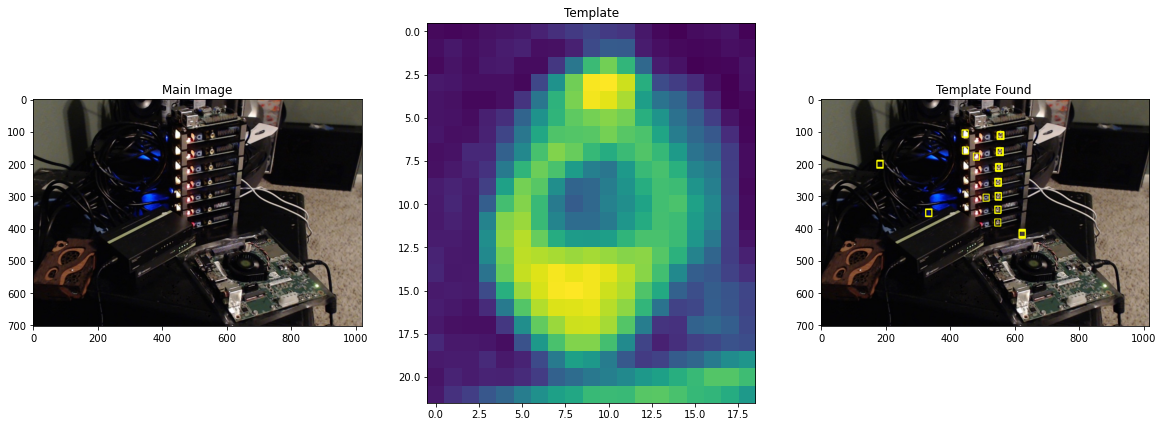

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

#open the main image and convert it to gray scale image
main_image = cv2.imread('img/test_image.jpg')
main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
main_image_copy = np.copy(main_image)
gray_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

#open the template as gray scale image
template = cv2.imread('img/test_template.jpg', 0)

#get the width and height
w, h = template.shape[::-1] 

#match the template using cv2.matchTemplate
# cv.matchTemplate(image, templ, method, result, mask)
match = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.7
# get the location of template in the image
loc = np.where(match >= threshold) 

#draw the rectangle around the matched template
for point in zip(*loc[::-1]): 
    cv2.rectangle(main_image_copy, point, (point[0] + w, point[1] + h), (255,255,0), 2)
    
# cv2.imshow('Template Found', main_image_copy)
# cv2.waitKey(0)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))
ax1.set_title('Main Image')
ax1.imshow(main_image)
ax2.set_title('Template')
ax2.imshow(template)
ax3.set_title('Template Found ')
ax3.imshow(main_image_copy)

### The process of Multi scaling is as follows:

1. Loop over the input image at multiple scales (i.e. make the input image progressively smaller and smaller).
2. Apply template matching using cv2.matchTemplate and keep track of the match with the largest correlation coefficient (along with the x, y-coordinates of the region with the largest correlation coefficient).
3. After looping over all scales, take the region with the largest correlation coefficient and use that as your “matched” region.

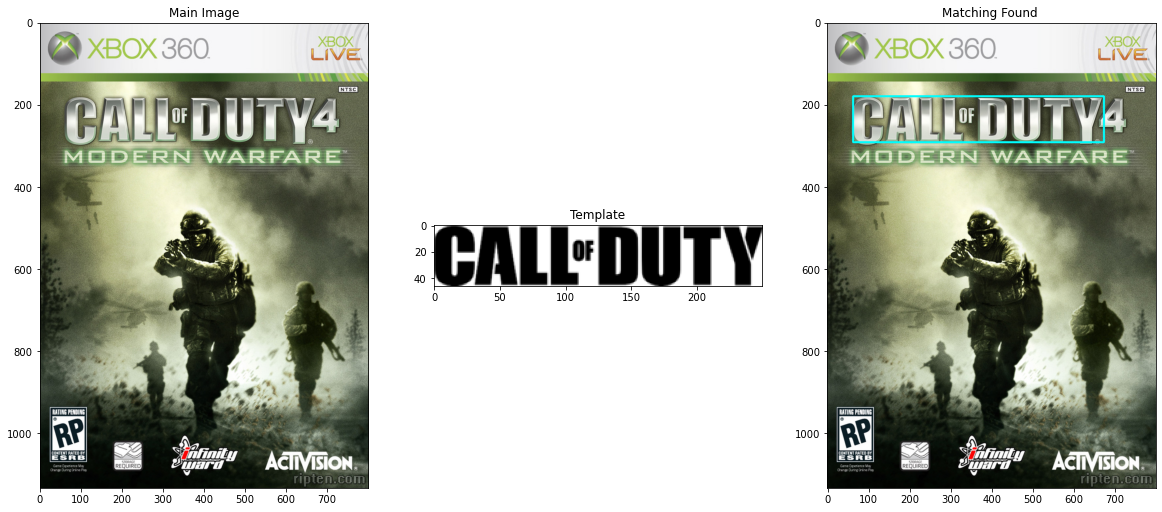

In [2]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import glob
import cv2
import matplotlib.pyplot as plt  
%matplotlib inline

# Load the image template
main_template = cv2.imread("img/cod_logo.png")
main_template = cv2.cvtColor(main_template, cv2.COLOR_BGR2RGB)

# Convert it to grayscale
template = cv2.cvtColor(main_template, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny
template = cv2.Canny(template, 50, 200)

# Determine width and height
(tH, tW) = template.shape[:2]

# load the image
image = cv2.imread("img/cod_mw.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert it to grayscale,
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# initialize the bookkeeping variable to keep track of the matched region
found = None

# loop over the multiple scales of the image
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)[source]
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    # resize the image according to the scale, and keep track
    # of the ratio of the resizing
    # resize(image, width = None, height = None, inter = cv2.INTER_AREA)
    resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
    r = gray.shape[1] / float(resized.shape[1])

    # if the resized image is smaller than the template, then break
    # from the loop
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break

    # detect edges in the resized, grayscale image and apply template
    # matching to find the template in the image
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

    # if we have found a new maximum correlation value, then ipdate
    # the bookkeeping variable
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)

# unpack the bookkeeping varaible and compute the (x, y) coordinates
# of the bounding box based on the resized ratio
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

image_copy = np.copy(image) 
# draw a bounding box around the detected result and display the image
cv2.rectangle(image_copy, (startX, startY), (endX, endY), (0, 255, 255), 4)
cv2.imshow("Image", image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20))
ax1.set_title('Main Image')
ax1.imshow(image)
ax2.set_title('Template')
ax2.imshow(main_template)
ax3.set_title('Matching Found ')
ax3.imshow(image_copy)

# Link 2

### Opencv Python program for Face Detection

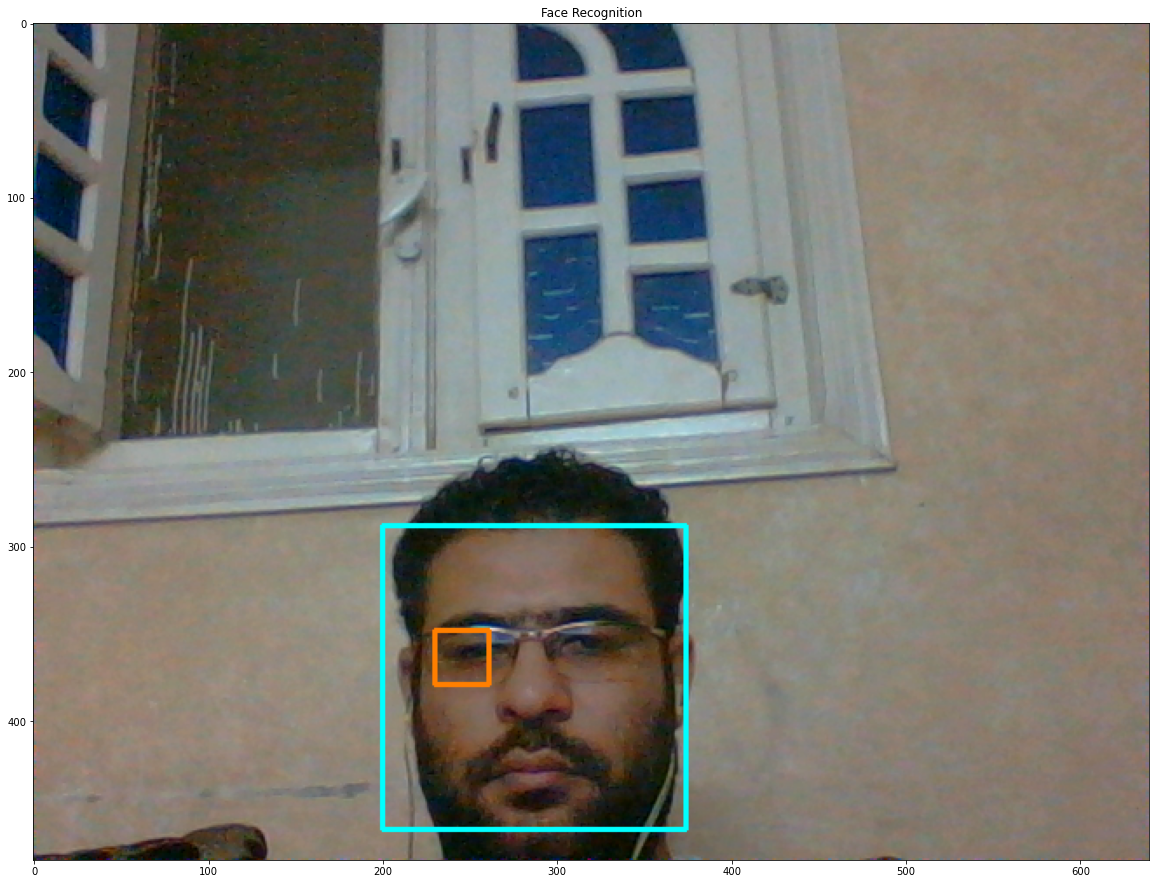

In [7]:
# OpenCV program to detect face in real time 
# import libraries of python OpenCV  
# where its functionality resides 
import cv2  
import matplotlib.pyplot as plt
# load the required trained XML classifiers 
# https://github.com/Itseez/opencv/blob/master/ 
# data/haarcascades/haarcascade_frontalface_default.xml 
# Trained XML classifiers describes some features of some 
# object we want to detect a cascade function is trained 
# from a lot of positive(faces) and negative(non-faces) 
# images. 
face_cascade = cv2.CascadeClassifier('Doc/haarcascade_frontalface_default.xml') 
  
# https://github.com/Itseez/opencv/blob/master 
# /data/haarcascades/haarcascade_eye.xml 
# Trained XML (contains many pre-trained classifiers) file for detecting eyes 
eye_cascade = cv2.CascadeClassifier('Doc/haarcascade_eye.xml')  
  
# capture frames from a camera 
cap = cv2.VideoCapture(0) 
  
# loop runs if capturing has been initialized. 
while 1:  
  
    # reads frames from a camera 
    ret, img = cap.read()  
  
    # convert to gray scale of each frames 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
    # Detects faces of different sizes in the input image 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
  
    for (x,y,w,h) in faces: 
        # To draw a rectangle in a face  
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)  
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = img[y:y+h, x:x+w] 
  
        # Detects eyes of different sizes in the input image 
        eyes = eye_cascade.detectMultiScale(roi_gray)  
  
        #To draw a rectangle in eyes 
        for (ex,ey,ew,eh) in eyes: 
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2) 
  
    # Display an image in a window 
    cv2.imshow('img',img) 
  
    # Wait for Esc key to stop 
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
  
# Close the window 
cap.release() 
  
# De-allocate any associated memory usage 
cv2.destroyAllWindows()  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(111) 
plt.title("Face Recognition") 
plt.imshow(img) 
plt.show() 

# Link 3

### Circle Detection using OpenCV | Python

- Initializing the Accumulator Matrix: Initialize a matrix of dimensions rows * cols * maxRadius with zeros.
- Pre-processing the image: Apply blurring, grayscale and an edge detector on the image. This is done to ensure the circles show as darkened image edges.
- Looping through the points: Pick a point x_i on the image.
- Fixing r and looping through a and b: Use a double nested loop to find a value of r, varying a and b in the given ranges.

for a in range(rows): <br>
    for b in range(cols): <br>
        r = math.sqrt((xi - a)**2 + (yi - b)**2) <br>
        accum_matrix[a][b][r] += 1<br>
        
- Voting: Pick the points in the accumulator matrix with the maximum value. These are strong points which indicate the existence of a circle with a, b and r parameters. This gives us the Hough space of circles.
- Finding Circles: Finally, using the above circles as candidate circles, vote according to the image. The maximum voted circle in the accumulator matrix gives us the circle.

### The HoughCircles function in OpenCV has the following parameters which can be altered according to the image.

1. Detection Method: OpenCV has an advanced implementation, HOUGH_GRADIENT, which uses gradient of the edges instead of filling up the entire 3D accumulator matrix, thereby speeding up the process.
2. dp: This is the ratio of the resolution of original image to the accumulator matrix.
3. minDist: This parameter controls the minimum distance between detected circles.
4. Param1: Canny edge detection requires two parameters — minVal and maxVal. Param1 is the higher threshold of the two. The second one is set as Param1/2.
5. Param2: This is the accumulator threshold for the candidate detected circles. By increasing this threshold value, we can ensure that only the best circles, corresponding to larger accumulator values, are returned.
6. minRadius: Minimum circle radius.
7. maxRadius: Maximum circle radius.

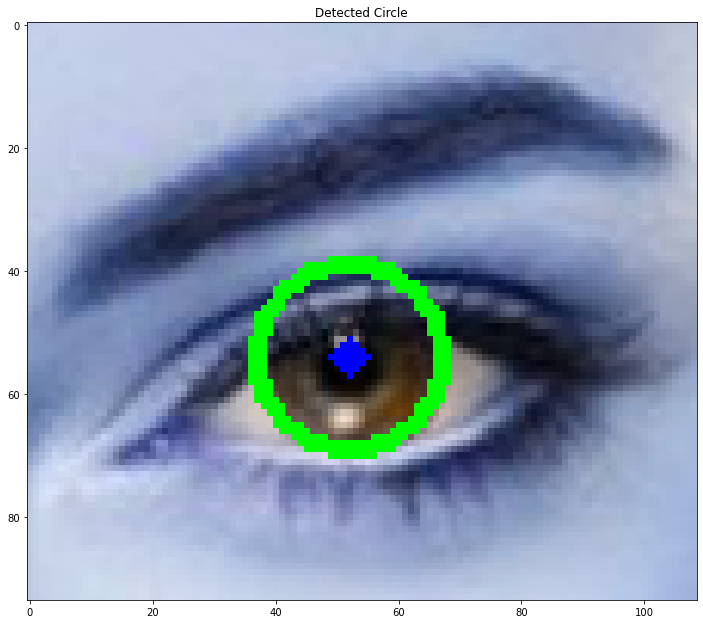

In [12]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
# Read image. 
img = cv2.imread('img/eye.jpg', cv2.IMREAD_COLOR) 
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 40) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
#         cv2.imshow("Detected Circle", img) 
#         cv2.waitKey(0)
        
        plt.figure(figsize=(12, 12))
        plt.subplot(111) 
        plt.title('Detected Circle') 
        plt.imshow(img)
        cv2.waitKey(0)
        plt.show() 

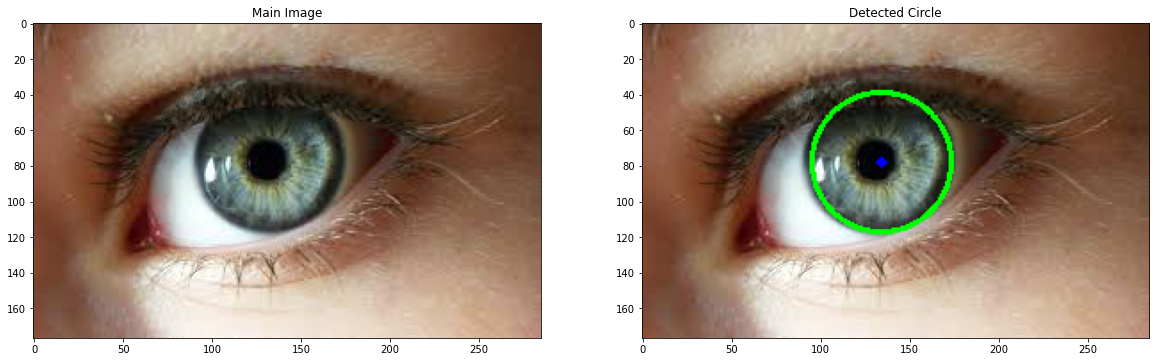

In [8]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline
  
# Read image. 
img = cv2.imread('img/eye.jpeg', cv2.IMREAD_COLOR) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img_copy = np.copy(img)
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
# cv.blur(src, ksize, dst, anchor, borderType)
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
# cv.HoughCircles(image, method, dp, minDist, circles, param1, param2, minRadius, maxRadius)
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 100, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 40) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
    
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img_copy, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle ("of radius 1) to show the center. 
        cv2.circle(img_copy, (a, b), 1, (0, 0, 255), 3) 
        
cv2.imshow("Detected Circle", img_copy) 
cv2.waitKey(0) 
cv2.destroyAllWindows()    

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.set_title('Main Image')
ax1.imshow(img)
ax2.set_title('Detected Circle')
ax2.imshow(img_copy)